In [10]:
using Plots, JSON, Peaks, OrderedCollections, DataFrames, StatsPlots, LaTeXStrings, StatsBase, MultivariateStats, Clustering, CSV, Distances
gr()

Plots.GRBackend()

In [11]:
master_df = CSV.File("2019-07-01-FSR-public_7061.csv") |> DataFrame;

In [12]:
filename = "patterns_540.json"
if !isfile(filename)
	filename = download("https://transfer.sh/wel5mB/patterns_540.json")
end

In [13]:
data = JSON.parsefile(filename, 
    dicttype=Dict,
    inttype=Int64,
    );

In [14]:
tgt = CSV.File("xe.dat") |> DataFrame
data["target.cif"] = tgt.theta,tgt.int

([4.03, 4.056, 4.082, 4.108, 4.134, 4.16, 4.186, 4.212, 4.238, 4.264  …  39.728, 39.754, 39.78, 39.806, 39.832, 39.858, 39.884, 39.91, 39.936, 39.962], [0.14756460269550806, 0.07593756420866207, 0.027872626154214694, 0.003647348112032414, -0.008179140405098737, -0.007941941816776639, -0.014447410095475977, -0.00993850187553682, -0.0038827067287750417, 0.0  …  -0.006898650506501704, -0.005080942691783007, -0.005544639228656973, -0.0067733170466287304, -0.005287326778580806, -0.0042312153720347224, -0.0030532485401810142, -0.002616568878948663, -0.003175041857728548, 0.0])

In [15]:

len = 2
loc_valor = map(data |> values) do (x,y)
    pks, vals = findmaxima(y)
    pks, proms = peakproms(pks, y)
    # rt = sort(vals, rev = :true) |> vals -> length(vals) > len ? vals[begin:len] : nothing
    rt = sort(proms, rev = :true) |> proms -> length(proms) > len ? proms[begin:len] : nothing #Ordeno por promincencia
    rtl = isnothing(rt) ? 0 : length(rt)
    rtl > 0 ? (x[begin:rtl], rt) : nothing #Retorno nothing si no hay numero suficiente de picos
end;

In [16]:
idx = findall(!isnothing, loc_valor);
loc_valor = loc_valor[idx];
labels = (data |> keys |> collect)[idx];
println(length(loc_valor))

6811


In [17]:
@assert "target.cif" ∈ labels

In [18]:
key = keys(data) |> collect |> sample
key = "target.cif" 
x,y = data[key]
pos = findall(x -> x == key, data |> keys |> collect ) |> first
# 
# df = DataFrame(x = x, y=y)
# p = @df df Plots.plot(:x, :y,
    # title=key,
    # xlabel=L"2\theta",
    # ylabel="Intensity",
# ) 
# 
# locs = loc_valor[pos][1]
# 
# for pk ∈ locs
    # vline!([pk], label = :false, color = :green)
# end
# p

1743

In [19]:
data_pc = map(loc_valor) do (x,y)
    vcat(x,y)' |> Array{Float64}
end #|> x -> vcat(x...)
pca_raw_data = vcat(data_pc...) ;


In [20]:
M = fit(PCA, pca_raw_data', maxoutdim = 4) 

PCA(indim = 2, outdim = 1, principalratio = 0.9965792632286274)

Pattern matrix (unstandardized loadings):
───────────
        PC1
───────────
1  -0.35734
2  35.2033
───────────

Importance of components:
──────────────────────────────────────
                                   PC1
──────────────────────────────────────
SS Loadings (Eigenvalues)  1239.4
Variance explained            0.996579
Cumulative variance           0.996579
Proportion explained          1.0
Cumulative proportion         1.0
──────────────────────────────────────

In [21]:
reconstructed = predict(M, pca_raw_data')

1×6811 Matrix{Float64}:
 -35.7637  35.2319  -44.2561  -48.998  …  31.6502  36.1868  23.4592  37.0733

In [22]:
R = kmeans(reconstructed, 10, display=:iter)

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       8.724713e+04


      1       5.702779e+04      -3.021934e+04 |       10
      2       5.191059e+04      -5.117196e+03 |       10
      3       4.962335e+04      -2.287239e+03 |       10
      4       4.834003e+04      -1.283322e+03 |       10
      5       4.746370e+04      -8.763277e+02 |       10
      6       4.680653e+04      -6.571702e+02 |       10
      7       4.603024e+04      -7.762869e+02 |       10
      8       4.538562e+04      -6.446235e+02 |       10
      9       4.475001e+04      -6.356093e+02 |       10
     10       4.402709e+04      -7.229240e+02 |       10
     11       4.335903e+04      -6.680550e+02 |        9
     12       4.283014e+04      -5.288963e+02 |       10
     13       4.245121e+04      -3.789242e+02 |       10
     14       4.217429e+04      -2.769250e+02 |       10
     15       4.196637e+04      -2.079185e+02 |       10
     16       4.172493e+04      -2.414368e+02 |       10
     17       4.155576e+04      -1.691691e+02 |       10
     18       4.145167e+04     

     31       4.077837e+04      -9.597446e+00 |        6
     32       4.076379e+04      -1.458680e+01 |        7
     33       4.074819e+04      -1.560123e+01 |        6
     34       4.073281e+04      -1.537991e+01 |        9
     35       4.072175e+04      -1.105213e+01 |        8
     36       4.071544e+04      -6.312472e+00 |        7
     37       4.070805e+04      -7.390588e+00 |        5
     38       4.070549e+04      -2.560947e+00 |        4
     39       4.070521e+04      -2.841038e-01 |        4
     40       4.070482e+04      -3.902621e-01 |        4
     41       4.070414e+04      -6.716101e-01 |        2
     42       4.070406e+04      -8.109379e-02 |        0
     43       4.070406e+04       0.000000e+00 |        0
K-means converged with 43 iterations (objv = 40704.06283906844)


KmeansResult{Matrix{Float64}, Float64, Int64}([15.919161186178348 -32.821010878563314 … -55.93209013090716 -42.33349670520453], [2, 3, 10, 6, 8, 2, 4, 4, 3, 6  …  4, 3, 5, 3, 1, 3, 3, 3, 7, 3], [8.659589536809563, 0.7416996907659268, 3.696245307999561, 0.23005462649689434, 3.039376584140655, 0.05949149101797957, 1.3331322020214316, 23.079912223401095, 8.41984046359994, 7.637612092817108  …  0.10594197298726726, 15.028996707139868, 25.514106106608676, 0.9478928940052356, 0.008252493425118246, 0.6329997385596471, 19.739552377767723, 0.008777311456015013, 12.966798196846867, 0.9608217118393441], [484, 476, 2407, 389, 445, 610, 524, 380, 422, 674], [484, 476, 2407, 389, 445, 610, 524, 380, 422, 674], 40704.06283906844, 43, true)

In [23]:
R.centers

1×10 Matrix{Float64}:
 15.9192  -32.821  36.0931  -10.2834  3.1537  …  -21.6403  -55.9321  -42.3335

In [24]:
PM = fit(PCA, pca_raw_data' ,maxoutdim = 3)
reconstructed_p = predict(M, pca_raw_data')
R = kmeans(reconstructed_p, 10, display=:iter)
p = scatter(reconstructed_p[1,:], reconstructed_p[2,:], reconstructed_p[3,:], marker_z = R.assignments, label = "Instances", size = (1920,1080))
scatter!([reconstructed_p[1,pos]],[ reconstructed_p[2,pos]], [reconstructed_p[3,pos]], marker_z = R.assignments, markersize = 11, marker=:octagon,color=:blue, label = "PerMOF")
scatter!(R.centers[1,:], R.centers[2,:], R.centers[3,:], marker = :diamond, markersize = 9, label = "Centers")
savefig("clustels.png")

BoundsError: BoundsError: attempt to access 1×6811 Matrix{Float64} at index [2, 1:6811]

In [25]:
lbls = [ lbl[begin:end-4] for lbl in labels]
mapping = Dict(k => v for (k,v) in zip(lbls,R.assignments));

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       6.489801e+04
      1       5.183484e+04      -1.306317e+04 |       10
      2       4.708635e+04      -4.748492e+03 |       10
      3       4.445458e+04      -2.631772e+03 |       10
      4       4.316900e+04      -1.285578e+03 |       10
      5       4.242453e+04      -7.444659e+02 |       10
      6       4.197303e+04      -4.514996e+02 |        9
      7       4.169802e+04      -2.750171e+02 |        9
      8       4.153465e+04      -1.633698e+02 |        9
      9       4.142621e+04      -1.084332e+02 |        8
     10       4.135009e+04      -7.611774e+01 |        6
     11       4.129746e+04      -5.263366e+01 |        5
     12       4.125569e+04      -4.177050e+01 |        5
     13       4.118842e+04      -6.726671e+01 |        5
     14       4.111765e+04      -7.077531e+01 |        5
     15       4.106621e+04      -5.144105e+01 |        

In [26]:
println("La referencia está en el cluster $(R.assignments[pos])")

La referencia está en el cluster 6


In [27]:
df_fsr = filter(
    x -> x.filename ∈ labels .|> label -> label[begin:end - 4] ,
    master_df
)
df_fsr."cluster_assignment" = map(filename -> mapping[filename], df_fsr.filename);

In [28]:
dist = Euclidean()
pwdist = pairwise(dist,reconstructed, dims=2)
idx10masparecidos = partialsortperm(pwdist[pos,2:end], 1:10); 


In [29]:
idx100masparecidos = partialsortperm(pwdist[pos,2:end], 1:100) 
los100masconref = hcat(reconstructed[:,idx100masparecidos], reconstructed[:,pos])
pw100 = pairwise(dist,los100masconref,dims=2)

hc = hclust(pw100)
plot(hc, size = (6000,3000))
savefig("hclust.png")

In [30]:
function hierarchical_clustering(pca_otp::Any, n::Union{Bool,T}, pos_ref::T, labels ) where {T <: Int, S}
    dist = Euclidean()
    pairwise_distance = pairwise(dist, pca_otp, dims = 2)
    if n != :false
        indeces = partialsortperm(pairwise_distance[pos_ref,2:end], 1:n)
        ipt = hcat(pca_otp[:,indeces], pca_otp[:,pos_ref])
        # ipt = pca_otp[:,indeces]
        pairwise_distance = pairwise(dist, ipt, dims = 2)
        for (n,idx) in enumerate(indeces)
            println("Indice $n es $(labels[idx])")
        end
    end
    pos_ref = n + 1
    println("Ref es el nro $pos_ref")
    hclust(pairwise_distance)
end

hierarchical_clustering (generic function with 1 method)

Indice 1 es REXFIL_freeONLY.cif
Indice 2 es ja408959g_si_002_freeONLY.cif
Indice 3 es XUYDIF_freeONLY.cif
Indice 4 es MULXUO_freeONLY.cif
Indice 5 es BALPAH_freeONLY.cif
Indice 6 es AXOHIE_freeONLY.cif
Indice 7 es CAJWIV_ion_b.cif
Indice 8 es GEDTAM_freeONLY.cif
Indice 9 es CAYDUD_freeONLY.cif
Indice 10 es NEHZIK_freeONLY.cif
Indice 11 es LUMYEZ_freeONLY.cif
Indice 12 es KULMEK_freeONLY.cif
Indice 13 es FUNGAY_freeONLY.cif
Indice 14 es KEDJAG22_freeONLY.cif
Indice 15 es NARHEV_charged.cif
Indice 16 es UVASAM01_freeONLY.cif
Indice 17 es FIHLOZ_freeONLY.cif
Indice 18 es LABPOV_freeONLY.cif
Indice 19 es cg500033b_si_003_freeONLY.cif
Indice 20 es c6cc00862c_c6cc00862c2_freeONLY.cif
Indice 21 es GIYTAK_freeONLY.cif
Indice 22 es MECVOG_freeONLY.cif
Indice 23 es IRELAU_freeONLY.cif
Indice 24 es KONFIE_freeONLY.cif
Indice 25 es UZUNAF01_freeONLY.cif
Indice 26 es LETVUB_freeONLY.cif
Indice 27 es MODMIB_freeONLY.cif
Indice 28 es ROCZIU_freeONLY.cif
Indice 29 es MITTAL_charged.cif
Indice 30 es EN

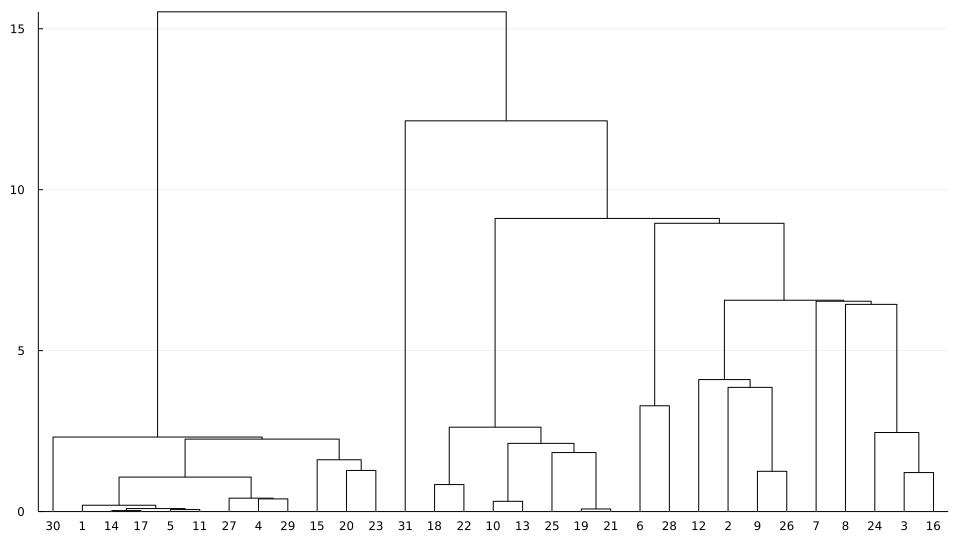

In [31]:
hc10 = hierarchical_clustering(reconstructed, 30, pos, labels)
plot(hc10, size = (1920/2, 1080/2))

In [32]:
plots_db = []
ref = Plots.plot(data["target.cif"], label = "referencia")
ylabel!(L"\textrm{Transmitancia}")
xlabel!(L"\textrm{Nro de onda} (cm^-1)")
for label in labels[idx10masparecidos]
    x,y = data[label]
    pi = plot(ref)
    title!(label)
    push!(plots_db,plot!(pi,x,y./100, legend = false))
end
plot(plots_db..., size = (8000,3000))
savefig("to2.png")

In [33]:
mtch = labels[idx10masparecidos] .|> x -> x[begin:end-4]

10-element Vector{String}:
 "REXFIL_freeONLY"
 "ja408959g_si_002_freeONLY"
 "XUYDIF_freeONLY"
 "MULXUO_freeONLY"
 "BALPAH_freeONLY"
 "AXOHIE_freeONLY"
 "CAJWIV_ion_b"
 "GEDTAM_freeONLY"
 "CAYDUD_freeONLY"
 "NEHZIK_freeONLY"

In [34]:
diezmasparecidos = filter(:filename => filename -> filename ∈ mtch , df_fsr)
CSV.write("10masparecidos.csv", diezmasparecidos)

"10masparecidos.csv"

In [35]:
same_cluster = filter(:cluster_assignment =>  x -> x == 4, df_fsr)
CSV.write("same_cluster.csv", same_cluster)

"same_cluster.csv"